In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold,train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df = df.rename(columns = {"classification":'target'})

In [5]:
df.isna().mean()

id        0.0000
age       0.0225
bp        0.0300
sg        0.1175
al        0.1150
su        0.1225
rbc       0.3800
pc        0.1625
pcc       0.0100
ba        0.0100
bgr       0.1100
bu        0.0475
sc        0.0425
sod       0.2175
pot       0.2200
hemo      0.1300
pcv       0.1750
wc        0.2625
rc        0.3250
htn       0.0050
dm        0.0050
cad       0.0050
appet     0.0025
pe        0.0025
ane       0.0025
target    0.0000
dtype: float64

<AxesSubplot:>

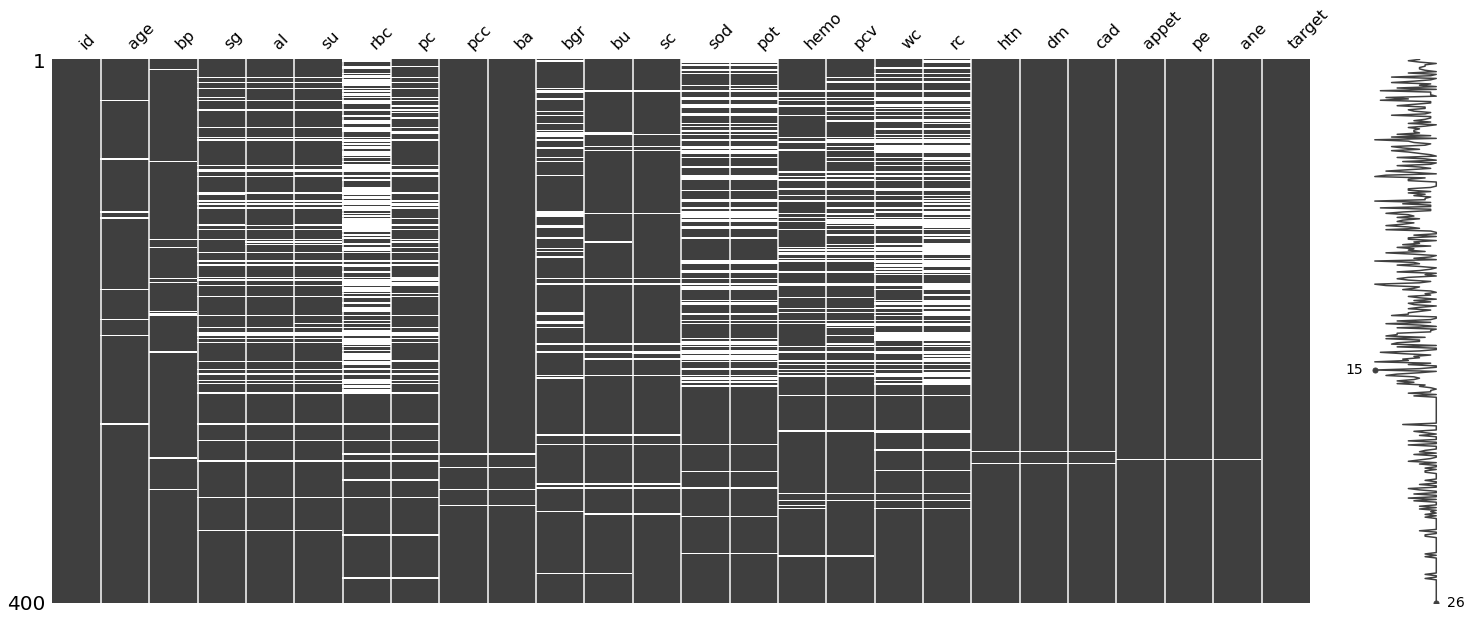

In [6]:
ms.matrix(df)

/home/balde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

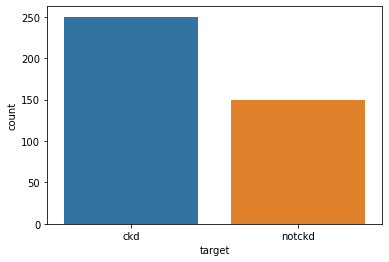

In [7]:
sns.countplot(df.target)

In [8]:
df.sample(20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
377,377,64.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6400,4.8,no,no,no,good,no,no,notckd
169,169,NaN,70.0,1.010,0.0,2.0,NaN,normal,notpresent,notpresent,...,27,NaN,NaN,yes,yes,no,good,no,yes,ckd
280,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,52,8100,5.2,no,no,no,good,no,no,notckd
41,41,45.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
165,165,60.0,80.0,1.020,0.0,2.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
352,352,37.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,48,7000,5.2,no,no,no,good,no,no,notckd
130,130,50.0,90.0,1.010,2.0,0.0,normal,abnormal,present,present,...,22,16300,2.7,no,no,no,poor,yes,yes,ckd
373,373,61.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,47,9200,4.9,no,no,no,good,no,no,notckd
97,97,65.0,60.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,32,9100,4,yes,yes,no,poor,yes,no,ckd
347,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43,7200,5.5,no,no,no,good,no,no,notckd


In [9]:
df.dtypes

id          int64
age       float64
bp        float64
sg        float64
al        float64
su        float64
rbc        object
pc         object
pcc        object
ba         object
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv        object
wc         object
rc         object
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
target     object
dtype: object

In [10]:
df.rbc.unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [11]:
df.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '10500', '4200', '4700', '10900', '8100',
       '9500', '2200', '12800', '11200', '19100', '?', '12300', '16700',
       '2600', '26400', '8800', '7400', '4900', '8000', '12000', '15700',
       '4100', '5700', '11500', '5400', '10800', '9900', '5200', '5900',
       '9300', '9700', '5100', '6600'], dtype=object)

In [12]:
# To replace the string caracters with NaN
df.rc.replace('?', np.nan, inplace=True)
df.wc.replace(('?'), np.nan, inplace=True)
df.pcv.replace(('?'), np.nan, inplace=True)

In [13]:
# now we have to change the datatype of pcv, wc and rc
df.wc = df.wc.astype('float64')
df.rc = df.rc.astype('float64')
df.pcv = df.pcv.astype('float64')

In [14]:
X = df.drop(['id','target'],axis=1)
y = df.target

In [15]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [16]:
# Encode remaining features
X = pd.get_dummies(X)
X.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0


In [17]:
pipeline = Pipeline([
#     ('encoder',OneHotEncoder(handle_unknown='ignore')),
    ('impute',SimpleImputer(missing_values=np.nan,strategy='mean')),
    ('scale',StandardScaler())
])

In [18]:
X = pd.DataFrame(columns=X.columns, data=pipeline.fit_transform(X))

In [19]:
X

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,-0.205464,0.262338,0.483355,-0.013338,-0.437797,-0.361987,-0.435268,-0.333743,0.000000,0.000000,...,-1.370291,1.385535,0.314485,-0.304789,0.511693,-0.507801,0.488252,-0.484322,0.424195,-0.420084
1,-2.623810,-1.966580,0.483355,2.347516,-0.437797,0.000000,-0.800941,-0.405039,0.000000,0.000000,...,0.729772,-0.721743,0.314485,-0.304789,0.511693,-0.507801,0.488252,-0.484322,0.424195,-0.420084
2,0.620313,0.262338,-1.381391,0.773613,2.479925,3.681441,-0.089909,-0.226800,0.000000,0.000000,...,-1.370291,1.385535,0.314485,-0.304789,-1.954297,1.969276,0.488252,-0.484322,-2.357409,2.380476
3,-0.205464,-0.480635,-2.313764,2.347516,-0.437797,-0.415543,-0.028964,0.129677,-2.885831,-0.755345,...,0.729772,-0.721743,0.314485,-0.304789,-1.954297,1.969276,-2.048122,2.064742,-2.357409,2.380476
4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,-0.562820,-0.638420,-0.298096,0.000000,0.000000,...,0.729772,-0.721743,0.314485,-0.304789,0.511693,-0.507801,0.488252,-0.484322,0.424195,-0.420084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207425,0.262338,0.483355,-0.800290,-0.437797,-0.107600,-0.171170,-0.458510,1.356638,0.096851,...,0.729772,-0.721743,0.314485,-0.304789,0.511693,-0.507801,0.488252,-0.484322,0.424195,-0.420084
396,-0.559368,-0.480635,1.415727,-0.800290,-0.437797,-0.977874,-0.536844,-0.333743,0.377606,-0.400263,...,0.729772,-0.721743,0.314485,-0.304789,0.511693,-0.507801,0.488252,-0.484322,0.424195,-0.420084
397,-2.328890,0.262338,0.483355,-0.800290,-0.437797,-0.643153,-0.638420,-0.440686,-0.057519,-0.080690,...,0.729772,-0.721743,0.314485,-0.304789,0.511693,-0.507801,0.488252,-0.484322,0.424195,-0.420084
398,-2.033969,-1.223607,1.415727,-0.800290,-0.437797,-0.455709,-0.150855,-0.369391,-0.275081,0.096851,...,0.729772,-0.721743,0.314485,-0.304789,0.511693,-0.507801,0.488252,-0.484322,0.424195,-0.420084


<AxesSubplot:>

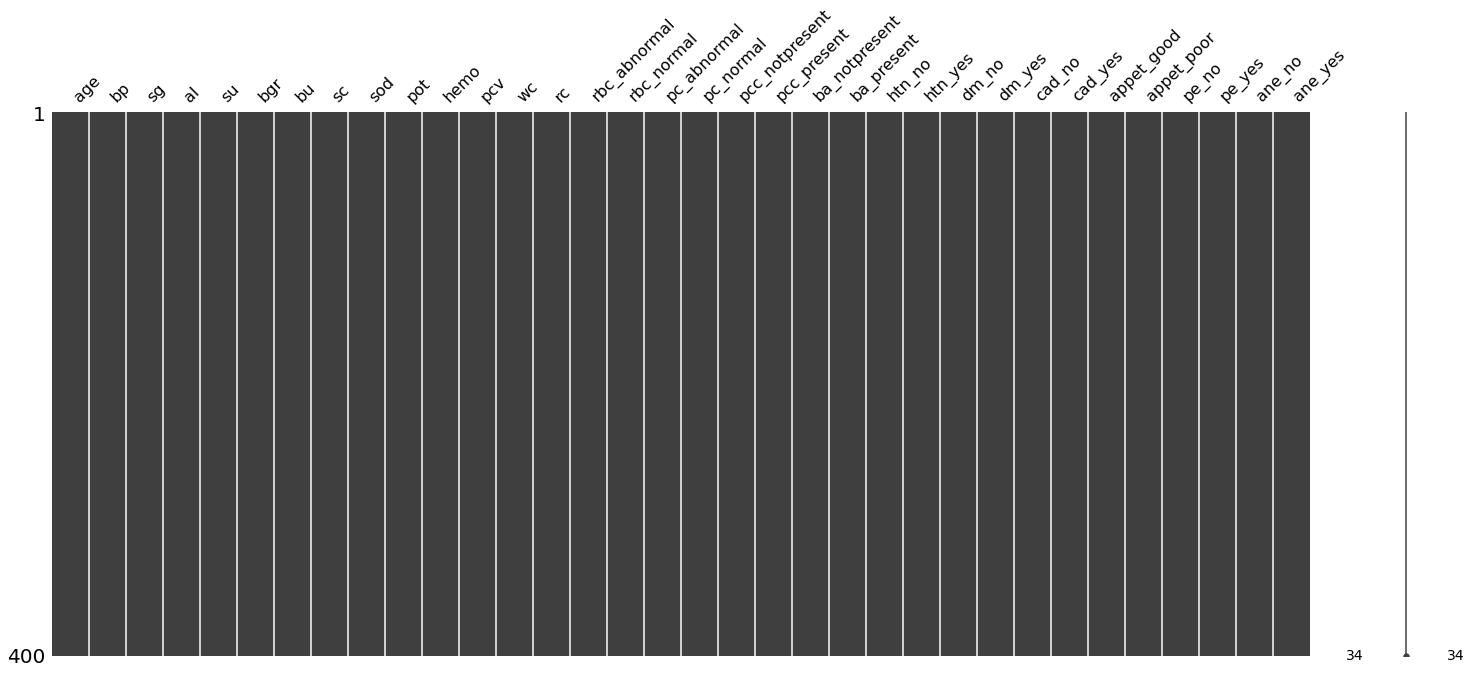

In [20]:
ms.matrix(X)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [22]:
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

LGBMClassifier()

In [23]:
from sklearn.metrics import  classification_report
y_pred = lgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.97      1.00      0.99        35

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [24]:
%%time
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

preds = []
scores = []
feature_importance_df = pd.DataFrame()

for fold, (idx_train, idx_valid) in enumerate(kf.split(X, y)):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]
    
    model = LGBMClassifier(**params)
    
    model.fit(X_train, y_train,
              eval_set = [(X_valid, y_valid)],
              verbose = False,
              early_stopping_rounds = 300)
    
    pred_valid = model.predict_proba(X_valid)[:,1]
    fpr, tpr, _ = roc_curve(y_valid, pred_valid)
    score = auc(fpr, tpr)
    scores.append(score)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    print(f"Fold: {fold + 1} Score: {score}" "\n")
    print('||'*40, "\n")
    
    #test_preds = model.predict_proba(X_test)[:,1]
    #preds.append(test_preds)
    
print(f"Overall Validation Score: {np.mean(scores)}")

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'